## Predicing a Box Office Success

The Film Industry is an old and large industry that ingrained itself upon United States culture. Film has a rich, unique history and has been defined by entire Eras of filmmaking. In Film's infancy, the Western style dominated the screen. Later this system fell as the television became a common household item. For a time films simply explored. Then Spielburg introduced the 'Blockbuster' to the world, debuting Jaws in 1975. Since Jaws, blockbusters have been a mainstay and although Film has entered into the Superhero Era, the blockbuster is still here. 

However, the Superhero Era is not the only new Era for Film. Big Data has also had an impact on the Film Industry. Consider Netflix and their 'Million Dollar' algorithm which recommends movies and tv-shows to viewers.According to Netflix, that algorithm is a major reason the company has kept so many subscribers. At one time, Netflix offered one million dollars to anyone who could craft a more efficient algorithm. Even without a deep search through the internet, there is a clear sign of film tending toward data.

The amount of data available on film today is staggering compared to just a decade ago. In fact, it was about 1995 before digital ticket sales became popular. Even today a small portion of theaters operate purely on paper tickets and cash sales. But what is truly remarkable, is the lack of open data. There are now detailed bugetary reviews and theater ticket breakdowns driven by machine learning; complex algorithms that consider genre and sub-genre and runtime and directors and release dates and location based information and ... and ... Not much of the data is available for free. Especially bugetary information. Most of that data is locked away behind a paywall.

So what can we do with our free data? 
What data is available?
Who will save us? 

Luckily, movie fans and data scientists alike have begun compiling datasets which do have some of the good information like genre, runtime, and audience scores. This tutorial will walk through retrieving some of that data and using it to explore the film industry. The end goal is simple: can gross revenue or gross profit be predicted with a limited set of data?

*explain blockbuster*

In [1]:
# all imports
import pandas as pd                     # data frames
import numpy as np                      # ndarrays
from plotnine import *                  # descriptive plotting
import statsmodels.api as sm            # simple linear regression model
import statsmodels.formula.api as smf   # other linear regression needs
from sklearn.model_selection import train_test_split # for training data

## Get The Data

The first step is to indentify a solid dataset. 
For this project, I recommend using a kaggle : https://www.kaggle.com/danielgrijalvas/movies/data
This is one of the more complete datasets I found during my search and is far superior to data scraping from a site like 'The Numbers'. Attaining the same data (slightly more actually) through web scraping took about two full hours of requesting the website. 

Compare this to a less than 800Kb download file.

In [2]:
df = pd.read_csv("datasets_2745_4700_movies.csv", encoding="ISO-8859-1") # proper encoding needed
                                                                         # csv file from Kaggle
display(df.info())      # what are we working with?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


None

### Clarifications for a few features: 
- bugdet = how much it cost to produce the film (not marketing, ect..; actors, equipment, props...)
- gross = worldwise box office, total revenue
- score = IMDb user rating  [0-10]
- votes = IMDb, number of voters
- genre = main genre only
- star  = main star of the film
- released = release data of the film
- company = production company
- year  = year of release, same year as in 'released'
- name  = name of film
- rating = content rating, [P, PG, R...]

## EDA

In [3]:
display(df.describe())  # some basic statistical information

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


The above is some basic statistial information. From it we can learn a bit of information.

By comparing mean 'budget' and 'gross', it would appear that the average movie in this dataset turns a profit of about ninty million dollars and has a score of 6.37 on IMDb. Also, it was likely relesed in 2001. Doubtless, the accuracy of this summary is doubtful. At the reason why is at the core of film. When I mentioned the first Era of Film History, the Wester, I left out one key detail. Genres. Hollywood has always been ruled by genre. Even when Westerns were the main film type, there were genres. When the blockbuster revived a dying Hollywood, it reinstated the genre system.

So let's move a step further and break down each genre.

In [4]:
display(df.groupby('genre').describe()) # genre specific statistical information
display(df.groupby('genre')['gross'].describe())

budget                                                     \
            count          mean           std        min         25%   
genre                                                                  
Action     1331.0  4.888980e+07  5.308445e+07        0.0   8015000.0   
Adventure   392.0  3.730161e+07  4.765882e+07        0.0         0.0   
Animation   277.0  6.432671e+07  5.632259e+07        0.0  18000000.0   
Biography   359.0  1.695594e+07  2.078357e+07        0.0         0.0   
Comedy     2080.0  1.492215e+07  2.033416e+07        0.0         0.0   
Crime       522.0  1.627576e+07  2.082270e+07        0.0         0.0   
Drama      1444.0  1.326435e+07  2.178858e+07        0.0         0.0   
Family       14.0  8.537857e+06  1.198477e+07        0.0         0.0   
Fantasy      32.0  1.576381e+07  2.414771e+07        0.0   3000000.0   
Horror      277.0  1.184693e+07  1.362352e+07        0.0   1500000.0   
Musical       4.0  2.500000e+06  5.000000e+06        0.0         0.0   
Mystery      38.0  2.684342e+07  3.232034e+07        0.0   5750000.0   
Romance      15.0  5.480000e+06  1.310285e+07        0.0         0.0   
Sci-Fi       13.0  1.688462e+07  2.128003e+07        0.0   4000000.0   
Thriller     18.0  5.888889e+06  8.108738e+06        0.0         0.0   
War           2.0  0.000000e+00  0.000000e+00        0.0         0.0   
Western       2.0  6.000000e+06  5.656854e+06  2000000.0   4000000.0   

                                                  gross                ...  \
                  50%          75%          max   count          mean  ...   
genre                                                                  ...   
Action     32000000.0   70000000.0  300000000.0  1331.0  5.619281e+07  ...   
Adventure  20000000.0   50000000.0  250000000.0   392.0  5.330381e+07  ...   
Animation  59000000.0  100000000.0  260000000.0   277.0  9.148810e+07  ...   
Biography  10900000.0   28000000.0  110000000.0   359.0  2.400425e+07  ...   
Comedy      6950000.0   22000000.0  175000000.0  2080.0  2.574203e+07  ...   
Crime       8000000.0   25000000.0  110000000.0   522.0  1.957440e+07  ...   
Drama       2500000.0   18000000.0  200000000.0  1444.0  1.745472e+07  ...   
Family            0.0   18000000.0   35000000.0    14.0  8.436443e+06  ...   
Fantasy     6750000.0   15500000.0  100000000.0    32.0  2.014541e+07  ...   
Horror      8000000.0   17000000.0   90000000.0   277.0  2.569620e+07  ...   
Musical           0.0    2500000.0   10000000.0     4.0  2.023748e+06  ...   
Mystery    21000000.0   32000000.0  150000000.0    38.0  3.631451e+07  ...   
Romance           0.0    4500000.0   50200000.0    15.0  9.717614e+06  ...   
Sci-Fi     12000000.0   20000000.0   80000000.0    13.0  2.367705e+07  ...   
Thriller          0.0    9500000.0   25000000.0    18.0  5.533345e+06  ...   
War               0.0          0.0          0.0     2.0  7.548875e+05  ...   
Western     6000000.0    8000000.0   10000000.0     2.0  9.259547e+06  ...   

               votes               year                                  \
                 75%        max   count         mean        std     min   
genre                                                                     
Action     144477.00  1839571.0  1331.0  2001.577010   9.271464  1986.0   
Adventure  107184.25  1352483.0   392.0  2001.522959   9.089748  1986.0   
Animation  141885.00   799707.0   277.0  2004.444043   8.150394  1986.0   
Biography   75036.50   956124.0   359.0  2003.392758   9.019783  1986.0   
Comedy      50895.00  1402876.0  2080.0  1999.852885   8.638788  1986.0   
Crime       76599.75  1861666.0   522.0  2000.448276   8.273527  1986.0   
Drama       51483.50  1492073.0  1444.0  2000.933518   8.898894  1986.0   
Family       7908.25    24126.0    14.0  1992.500000   4.799840  1986.0   
Fantasy     41734.25   284929.0    32.0  1995.406250   7.832354  1987.0   
Horror      79930.00   342870.0   277.0  2002.577617   9.411599  1986.0   
Musical     11085.75    29976.0   

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1331.0,5.619281e+07,8.364603e+07,547.0,6914048.50,26873932.0,6.859523e+07,936662225.0
Adventure,392.0,5.330381e+07,8.102622e+07,10230.0,5966297.25,20839239.0,5.893822e+07,408010692.0
Animation,277.0,9.148810e+07,9.697904e+07,5274.0,13596911.00,58867694.0,1.435286e+08,486295561.0
Biography,359.0,2.400425e+07,3.689086e+07,2670.0,1650605.50,8323085.0,3.060400e+07,255959475.0
Comedy,2080.0,2.574203e+07,3.742141e+07,309.0,1687347.25,10912053.5,3.467921e+07,330252182.0
Crime,522.0,1.957440e+07,2.985027e+07,441.0,655195.00,6477760.5,2.513003e+07,183405771.0
Drama,1444.0,1.745472e+07,3.665703e+07,1800.0,504095.75,3528566.0,1.891123e+07,658672302.0
Family,14.0,8.436443e+06,8.047000e+06,781727.0,2138406.00,5538349.0,1.144100e+07,26459681.0
Fantasy,32.0,2.014541e+07,2.861964e+07,3478.0,1657111.25,11034888.0,2.023836e+07,101071502.0


Without a doubt, some clarity. 

Rather than the average movie turning a massive profit, it can be seen that only a few genres command large profits. 'Family' even looses money on average. We also see high variance throughout the 'budget' data for each genre. More often than not, the standard deviation is greater than the mean. The same is true for gross revenue. 

This gives us some insight to the film industry, and makes sense upon reflection. Earlier, I mentioned the 'Blockbuster' and that the concept of the blockbuster is not going anywhere. This variance is exactly why. Movies are a make or break business. A major failure can cause cutbacks at a production company while a success brings an ocean of money. 

But what makes a success? At some level, this classifiction of success is itself debatable. But for this tutorial, we need something to examine. Two decent indicators are "Audience Score" which is how a film is rated by IMDb users and "Gross Revenue" which is the film's revenue. Both of these measures could be improved, such as ticket sale count in addition to revenue, but this data is lost to us. And 'less accurate' does not mean totally useless. Perhaps there is insight in our limited data after all. 

Below are two sections of graphs. One for "Audience Score" and one for "Gross Revenue"

## Audience Score
###### IMDb users score related to a few other features, displayed by genre

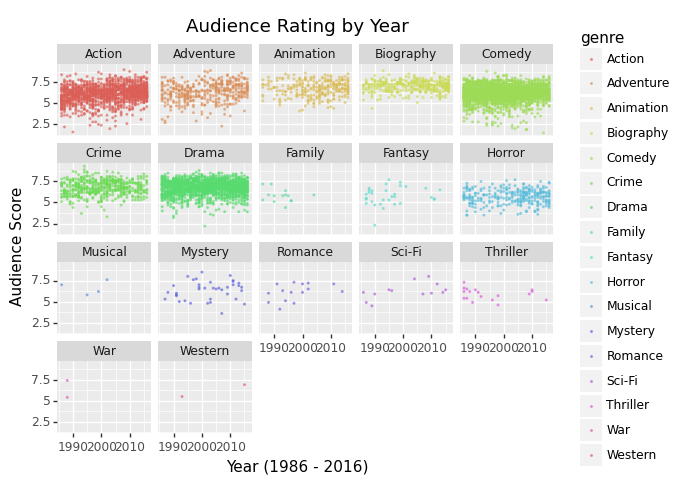

<ggplot: (8768536618229)>

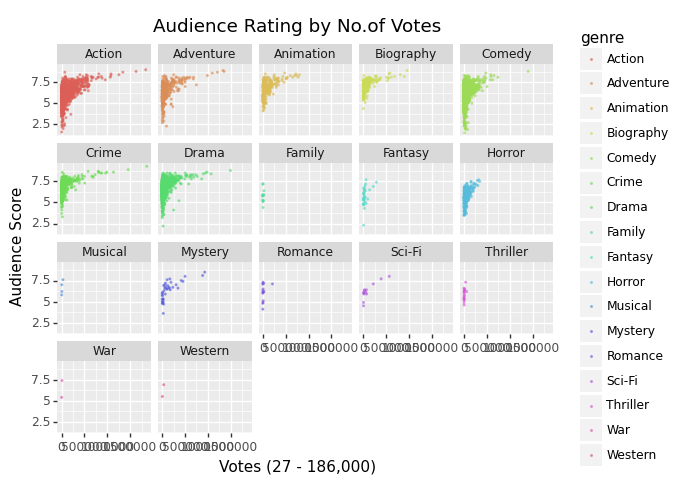

<ggplot: (8768531267033)>

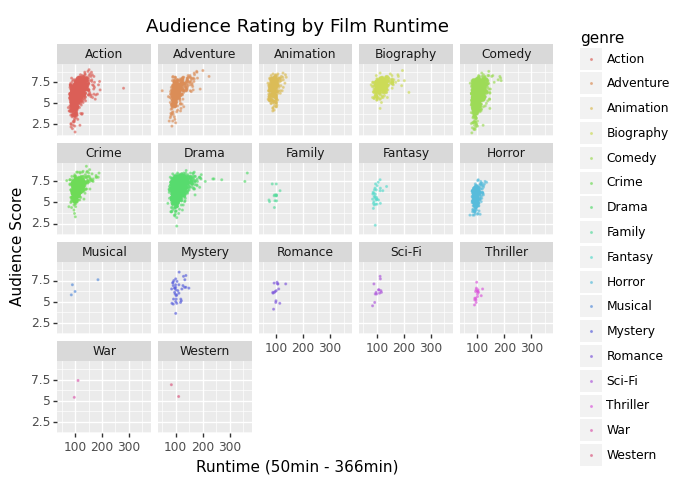

<ggplot: (8768529065621)>

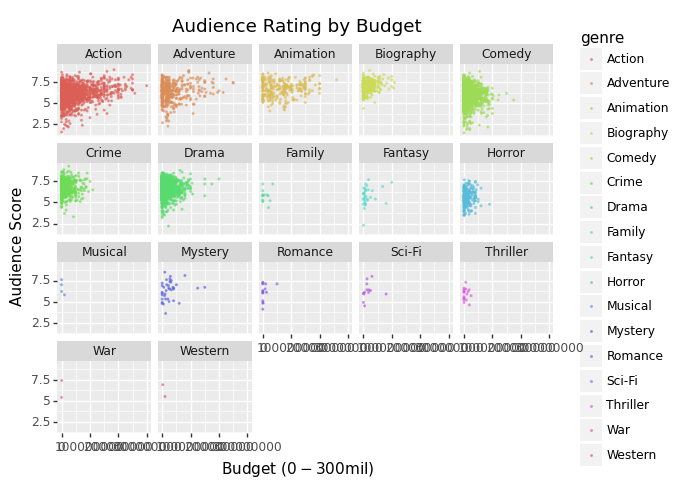

<ggplot: (8768531359769)>

In [5]:
audience_year = (ggplot(data=df)                        # Score ~ Year 
     + aes(x='year', y='score', color='genre')          # aesthetics
     + geom_point(size=.25, alpha=0.5)                  # use scatter plot
     + labs(title='Audience Rating by Year', 
            x='Year (1986 - 2016)', y='Audience Score') # major labels
     + facet_wrap('genre')                              # plot per genre
    )
display(audience_year)

audience_vote = (ggplot(data=df)                        # Score ~ Votes
     + aes(x='votes', y='score', color='genre')         # aesthetics
     + geom_point(size=0.25, alpha=0.5)                 # use scatter plot
     + labs(title='Audience Rating by No.of Votes',     # major labels
            x='Votes (27 - 186,000)', 
            y='Audience Score')  
     + facet_wrap('genre')                              # plot per genre
    )
display(audience_vote)

audience_runtime = (ggplot(data=df)                     # Score ~ Runtime 
     + aes(x='runtime', y='score', color='genre')       # aesthetics
     + geom_point(size=.25, alpha=0.5)                  # scatter plot
     + labs(title='Audience Rating by Film Runtime',    # major labels
            x='Runtime (50min - 366min)', 
            y='Audience Score')  
     + facet_wrap('genre')                              # plot per genre
    )
display(audience_runtime)

audience_budget = (ggplot(data=df)                         # Score ~ Budget 
     + aes(x='budget', y='score', color='genre')           # aesthetics
     + geom_point(size=.25, alpha=0.5)                     # use scatter plot
     + labs(title='Audience Rating by Budget', 
            x='Budget ($0 - $300mil)', y='Audience Score') # major labels
     + facet_wrap('genre')                                 # plot per genre
    )
display(audience_budget)

From the graphs, it is clear that audience ratings have not changed much over time except in 'Action' and maybe 'Adventure' and an even greater *maybe* on comedy. 'Sci-Fi' also seems to have improved, but the data is scarce with a mere thirteen films being 'Sci-Fi' of the entire set that we cannot really draw a distinction. 

The Number of Votes has an interesting graph which makes sense upon reflection. The correlation seems clear in that as a film receives more votes, it is more likely to receive positive votes. Meaning, if a film was great then a person is more likely to take the time to go onto IMDb and rate the film, almost like the film inspires the viewer to action. Runtime is less interesting to see but there are a few outliers worth noting. 'Drama', known for twists and turns and betrayls, keeps an audience glued to their seats. Meanwhile, most other genres stick to just under the two hour mark. This can be explained by "getting your money's worth". If a ticket price is the same regardless of film length, then a longer movie means more entertainment per dollar. Until the film continues for too long, boring audiences. 

'Budget' has promise, especially for 'Action', 'Adventure', 'Animation', and a little bit for 'Comedy' and 'Drama'. 

## Gross Revenue

###### Any outstanding correlations between Revenue and a single feature?

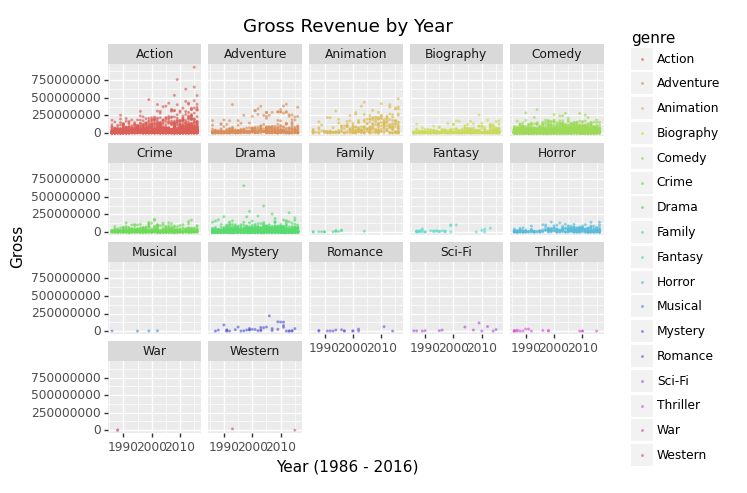

<ggplot: (8768531350121)>

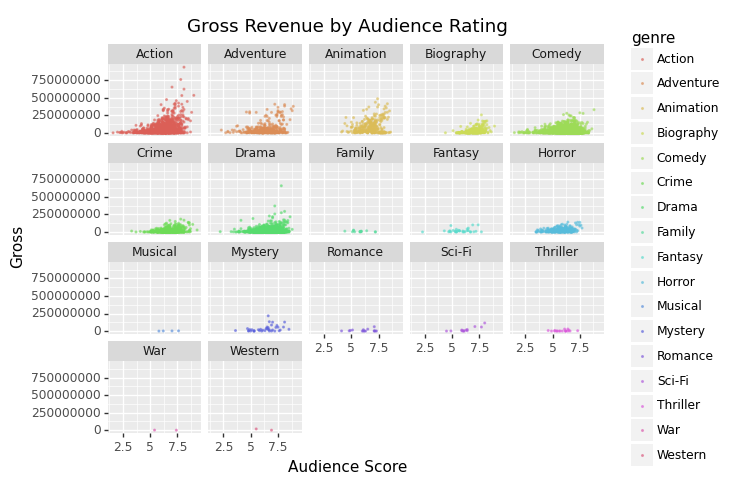

<ggplot: (8768528536497)>

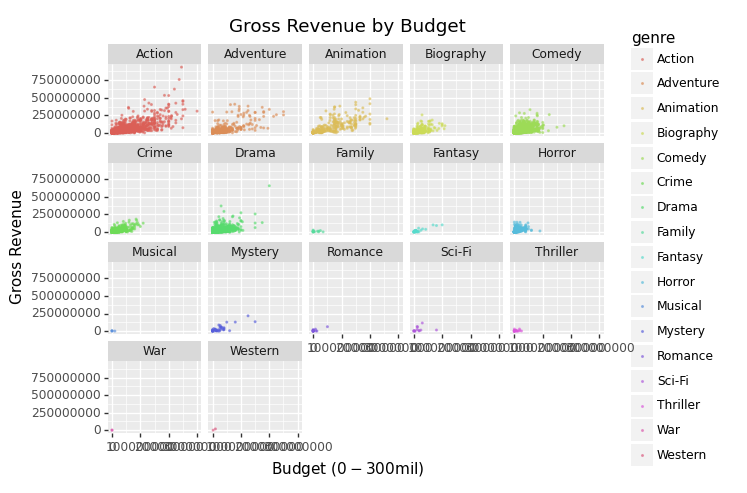

<ggplot: (8768529298589)>

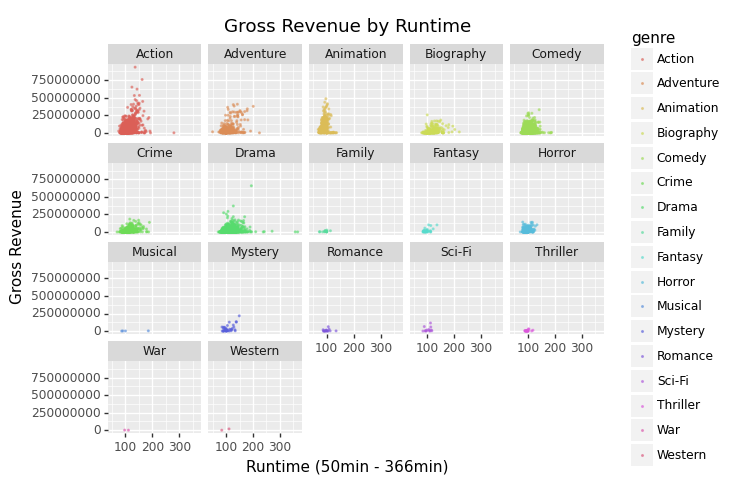

<ggplot: (8768528845661)>

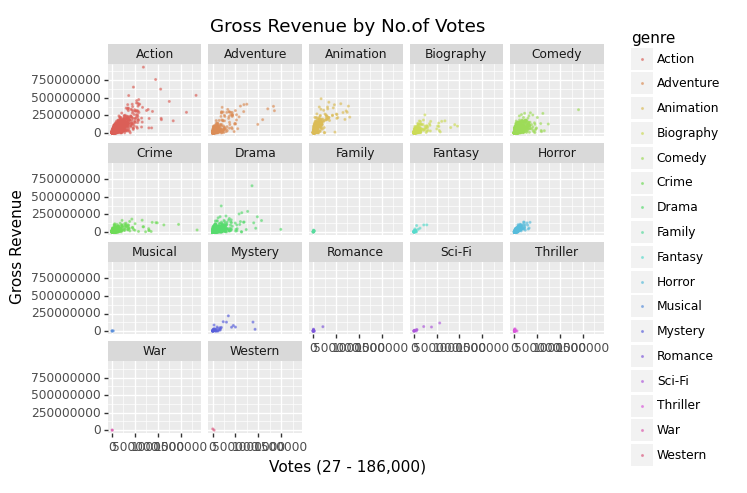

<ggplot: (8768531251005)>

In [6]:
gross_year = (ggplot(data=df)                          # Gross ~ Year
     + aes(x='year', y='gross', color='genre')         # aesthetics
     + geom_point(size=0.25, alpha=0.5)                # use scatter plot
     + labs(title='Gross Revenue by Year',             # major labels
            x='Year (1986 - 2016)',
            y='Gross') 
     + facet_wrap('genre')                             # plot per genre
    )
display(gross_year)

gross_audience = (ggplot(data=df)                      # Gross ~ Audience Score
     + aes(x='score', y='gross', color='genre')        # aesthetics
     + geom_point(size=0.25, alpha=0.5)                # use scatter plot
     + labs(title='Gross Revenue by Audience Rating',  # major labels
            x='Audience Score',
            y='Gross') 
     + facet_wrap('genre')                             # plot per genre
    )
display(gross_audience)

gross_budget = (ggplot(data=df)                   # Gross ~ Budget
     + aes(x='budget', y='gross', color='genre')  # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Gross Revenue by Budget',      # major labels
            x='Budget ($0 - $300mil)',
            y='Gross Revenue') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_budget)

gross_runtime = (ggplot(data=df)                  # Gross ~ Runtime 
     + aes(x='runtime', y='gross', color='genre') # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Gross Revenue by Runtime',     # major labels
            x='Runtime (50min - 366min)',
            y='Gross Revenue') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_runtime)

gross_votes = (ggplot(data=df)                    # Gross ~ Votes
     + aes(x='votes', y='gross', color='genre')   # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Gross Revenue by No.of Votes', # major labels 
            x='Votes (27 - 186,000)', 
            y='Gross Revenue') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_votes)

Gross Revenue seems to be most influenced by 'Budget', 'Audience Rating', 'No.of Votes'. Honestly, this section is not too iteresting. The only graph which is truly surprising is the relationship with 'No.of Votes'. It seems that if a film inspires enough people to give a rating online, that film is likley to sell well. 

But what this tutorial is really curious about is...

## Profit
###### Compute Profit and search for relations

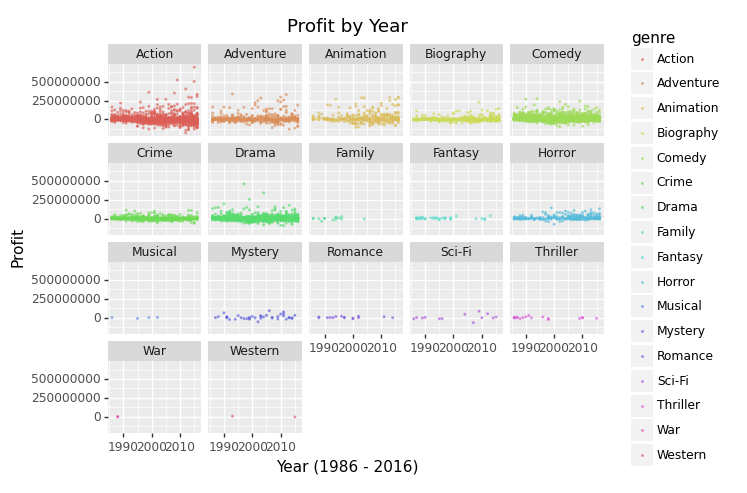

<ggplot: (8768582916409)>

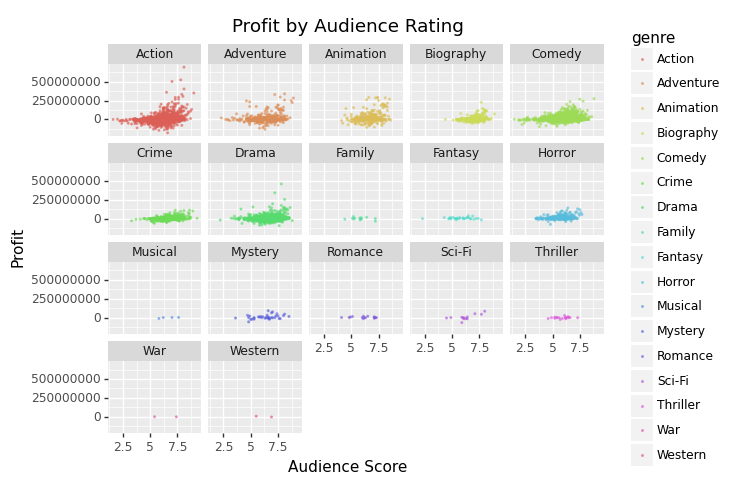

<ggplot: (8768529157045)>

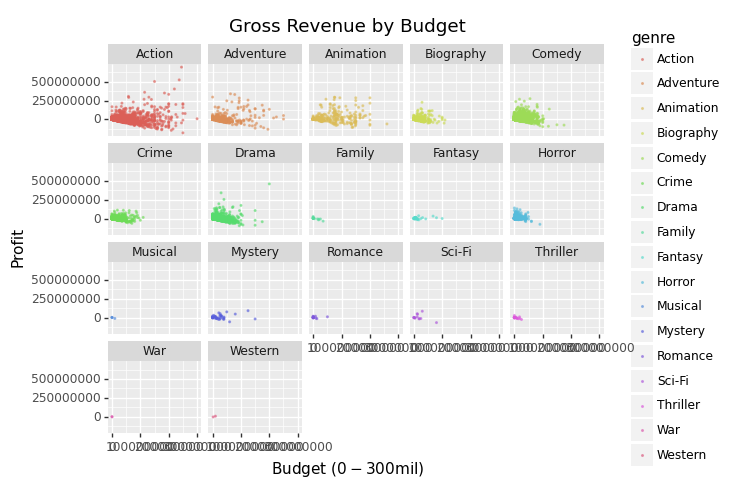

<ggplot: (8768529214229)>

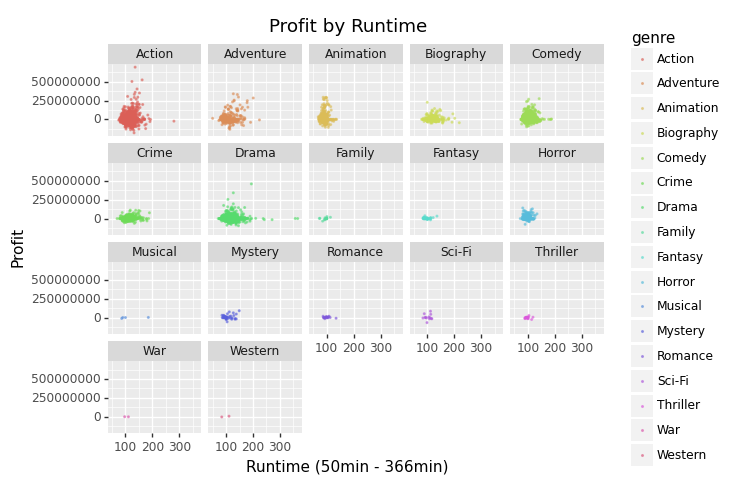

<ggplot: (8768531742457)>

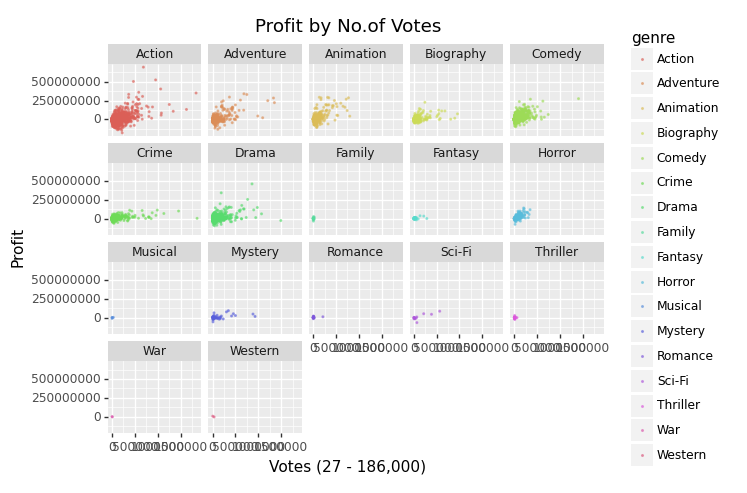

<ggplot: (8768531676821)>

In [7]:
df['profit'] = df['gross'] - df['budget']  # a simple calculation


gross_year = (ggplot(data=df)                     # Profit ~ Year
     + aes(x='year', y='profit', color='genre')   # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Profit by Year',               # major labels
            x='Year (1986 - 2016)',
            y='Profit') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_year)

gross_audience = (ggplot(data=df)                 # Profit ~ Audience Score
     + aes(x='score', y='profit', color='genre')  # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Profit by Audience Rating',    # major labels
            x='Audience Score',
            y='Profit') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_audience)

gross_budget = (ggplot(data=df)                   # Profit ~ Budget
     + aes(x='budget', y='profit', color='genre') # aesthetics
     + geom_point(size=0.25, alpha=0.5)           # use scatter plot
     + labs(title='Gross Revenue by Budget',      # major labels
            x='Budget ($0 - $300mil)',
            y='Profit') 
     + facet_wrap('genre')                        # plot per genre
    )
display(gross_budget)

gross_runtime = (ggplot(data=df)                   # Profit ~ Runtime 
     + aes(x='runtime', y='profit', color='genre') # aesthetics
     + geom_point(size=0.25, alpha=0.5)            # use scatter plot
     + labs(title='Profit by Runtime',             # major labels
            x='Runtime (50min - 366min)',
            y='Profit') 
     + facet_wrap('genre')                         # plot per genre
    )
display(gross_runtime)

gross_votes = (ggplot(data=df)                     # Profit ~ Votes
     + aes(x='votes', y='profit', color='genre')   # aesthetics
     + geom_point(size=0.25, alpha=0.5)            # use scatter plot
     + labs(title='Profit by No.of Votes',         # major labels 
            x='Votes (27 - 186,000)', 
            y='Profit') 
     + facet_wrap('genre')                         # plot per genre
    )
display(gross_votes)

Interesting. Overtime, films seem to be making less and less money. Budgets are negatively correlated, which makes sense as a large budget means less profits. Runtime mimics 'Gross Revenue' and once again 'No.of Votes' appears to be strongly correlated.

Time to find out just how indictive these features are.

## Machine Learning

###### Predicting Gross Revenue

The objective is to predict potential profit of a film which means 'Gross Revenue' cannot be considered. Predicting profits is predicting revenue because we already know the budget. Gross Revenue, like profit, is only known *after* the film has been released. That is not very predictive. 

So let's consider our other features. Among the most promising features are 'No.of Votes' and 'Audience Rating'. 'Budget' also plays a role (as it is part of the 'profit' definition) and 'Runtime' should also be considered since there is not much deviation. 

Let's build two models. One with the features above, and one with all other features

In [8]:
X = df[['score','votes','budget','runtime']] 
y = df['profit']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:44   Log-Likelihood:            -1.2820e+05
No. Observations:                6820   AIC:                         2.564e+05
Df Residuals:                    6815   BIC:                         2.564e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.701e+07   3.43e+06      4.962      0.000    1.03e+07    2.37e+07
score      -1.922e+05   5.04e+05     -0.382      0.703   -1.18e+06    7.95e+05
votes        187.0540      4.208     44.448      0.000     178.804     195.304
budget        -0.1936      0.014    -13.899      0.000      -0.221      -0.166
runtime    -1.448e+05   2.69e+04     -5.387      0.000   -1.97e+05   -9.21e+04
==============================================================================
Omnibus:                     4848.550   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           314473.633
Skew:                           2.761   Prob(JB):                         0.00
Kurtosis:                      35.805   Cond. No.                     3.58e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for 'score' is not small enough. Let's compare to a model without 'score'

In [9]:
X1 = df[['votes','budget','runtime']] 
y1 = df['profit']
X1 = sm.add_constant(X1)
est1 = sm.OLS(y1, X1).fit()
est1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     811.1
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:44:44   Log-Likelihood:            -1.2820e+05
No. Observations:                6820   AIC:                         2.564e+05
Df Residuals:                    6816   BIC:                         2.564e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.617e+07   2.63e+06      6.138      0.000     1.1e+07    2.13e+07
votes        186.4364      3.884     47.996      0.000     178.822     194.051
budget        -0.1923      0.013    -14.266      0.000      -0.219      -0.166
runtime    -1.483e+05   2.52e+04     -5.883      0.000   -1.98e+05   -9.89e+04
==============================================================================
Omnibus:                     4849.700   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           314016.105
Skew:                           2.763   Prob(JB):                         0.00
Kurtosis:                      35.780   Cond. No.                     2.74e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is improved, which we know by the significatnly increased F-stat (from 608.3 to 811.1). 
Time to test the model.

In [10]:
X = df[['votes','budget','runtime']]
y = df['profit']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train['profit'] = y_train

res = smf.ols(formula='profit ~ votes + budget + runtime', data=X_train).fit()

dfs = pd.DataFrame()
dfs['profit'] = y_test
dfs['predictions'] = res.predict(X_test)
dfs['accuracy'] = (dfs['profit'] - dfs['predictions']) / dfs['profit']
display(dfs[['profit','predictions','accuracy']])

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,profit,predictions,accuracy
5540,45662220.0,2.837188e+07,0.378658
3412,302365.0,4.297578e+06,-13.213214
6495,1590010.0,6.777905e+06,-3.262807
2660,75317794.0,2.696680e+07,0.641960
5437,-24793912.0,-4.877268e+06,0.803288
...,...,...,...
2988,4170647.0,4.918345e+06,-0.179276
946,25069101.0,1.986258e+06,0.920769
4130,75829.0,1.742045e+06,-21.973336
6812,23020.0,2.958797e+06,-127.531593


In [11]:
# lets check accuracy averages
display(dfs.mean())

profit         9.338346e+06
predictions    8.501594e+06
accuracy      -1.628698e+01
dtype: float64

## Insight and Conclusion

In conclusion, the model seems to be realtively accurate when comparing mean profit and mean prediction. Unfortunately, the model does not seem overall accurate. Which could be the result of a few outliers skewing the numbers. As a note, I also tested a few other combinations of predictive features and the created model was the most accurate found. Which means, we did our best. 

Gong forward with film data, I would like to analyze more in depth with genre and sub-genre, and how different features can create a recommendation algorithm like Netflix. I'm also extremely intersted in analysing actual film through .mp4 files. 